Problem statement: With the iris dataset ,Predicit the optimum number of clusters and represent it visually.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
#BASIC CHECKS

In [7]:
#checking the first 5 rows of our dataset


iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#checking the last 5 rows of our dataset


iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [9]:
#Quick summary of the data


iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
#Statistical information of the dataset

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#Check for null values

iris_df.isnull().sum() #no null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
#How do you find the optimum number of clusters for K Means? How does one determine the value of K?
#Determine K using elbow method

In [13]:
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans

#create new plot and data

x=iris_df.iloc[:, [0, 1, 2, 3]].values

wcss=[]

#K Means determines K

K = range(1,15)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    
    kmeanModel.fit(x)
    wcss.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_), axis=1)) / x.shape[0])
    

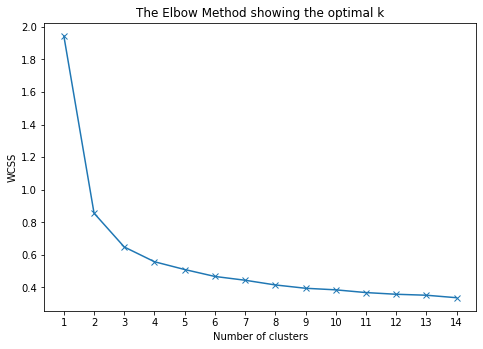

In [14]:
# Plotting the result onto a graph to observe the elbow

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,15))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
ax.set_title('The Elbow Method showing the optimal k')
ax.plot(K, wcss, marker = 'x')

plt.show()

In [15]:
#To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie.,
# the point after which the distortion/inertia start decreasing in a linear fashion.
# Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [16]:
kmeansModel = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeansModel = kmeansModel.fit_predict(x)

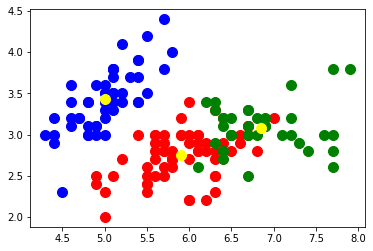

In [17]:
# Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeansModel == 0, 0], x[y_kmeansModel == 0, 1],
             s = 100 ,c = 'red', label = ["Iris-setosa"])
plt.scatter(x[y_kmeansModel == 1, 0], x[y_kmeansModel == 1, 1], 
             s = 100, c = 'blue', label = ["Iris-versicolour"])
plt.scatter(x[y_kmeansModel == 2, 0], x[y_kmeansModel == 2, 1],
             s = 100, c = 'green', label =["Iris-virginica"])


# Plotting the centroids of the clusters


plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()